# Codenation week 3

## Objetivo

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

## Detalhes

**A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset**. O arquivo para submissão deve estar em formato *json*, conforme o arquivo exemplo “submission.json”.

OBSERVAÇÃO: É recomendado utilizar Python e pandas para esse desafio, mas também é possível utilizar outras ferramentas e linguagens de programação.

Descrição dos dados: 
- ‘id’: Identificador do cliente 
- ‘sobrenome’: Sobrenome do cliente 
- ‘pontuacao_credito’: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) 
- ‘estado_residencia’: Estado de residência do cliente 
- ‘genero’: Gênero do cliente 
- ‘nivel_estabilidade’: Nível de estabilidade do cliente 
- ‘saldo_conta’: Saldo disponível na conta do cliente 
- ‘numero_produtos’: Número de produtos que o cliente consome 
- ‘possui_cartao_de_credito’: Possui um cartão de crédito cadastrado 
- ‘membro_ativo’: Membro acessa e consome frequentemente

Obs: Os dados são fictícios, mas tentam representar a realidade de uma base de clientes de um produto SaaS.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [117]:
## Load file
df = pd.read_csv('desafio1.csv', delimiter = ',', header=0, encoding= 'utf-8')

In [108]:
df.tail(3)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
6997,6998,6a0589e36c12f95a8d3678b460519ed654fe0a3e,e65e12a7eb4e0b15e6d3afb127ce38c0a5303188,611,SC,M,68,5,82547.11,2,1,1
6998,6999,c042de909a1fb157765c84c3278d8e6500807367,a52bbf77611eab47a6eff8641a1a9bd01006acbe,666,RS,F,47,5,0.00,1,0,0
6999,7000,cdce83890ea1d7b64b2caaaea76f499cb5dfe684,2265b3657cc5e97382dc46819e3937c363fe165e,521,SC,M,27,4,121325.84,1,1,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.50,5250.250,7000.00
pontuacao_credito,7000.0,649.787000,97.046279,350.0,582.00,651.00,717.000,850.00
idade,7000.0,38.892714,10.465562,18.0,32.00,37.00,44.000,92.00
nivel_estabilidade,7000.0,5.010286,2.887500,0.0,3.00,5.00,7.250,10.00
saldo_conta,7000.0,76471.883751,62403.383911,0.0,0.00,97277.13,127537.155,250898.09
numero_produtos,7000.0,1.526000,0.583047,1.0,1.00,1.00,2.000,4.00
possui_cartao_de_credito,7000.0,0.703286,0.456842,0.0,0.00,1.00,1.000,1.00
membro_ativo,7000.0,0.512143,0.499888,0.0,0.00,1.00,1.000,1.00


- $\approx 70\%$ dos clientes *possui_cartao_de_credito* \
- $\approx 51\%$ dos clientes são de *membro_ativo* \
- A *pontuacao_credito* varia entre 350 e 850, a média da pontuação dos seus clientes é de  $\mu \approx 650$
- O *nivel_estabilidade* varia entre 0 e 10, a média do nível de estabilidade é de $\mu \approx 5$
- A variável *saldo_conta* possui $\sigma$ na mesma ordem de grandeza da $\mu$, isto demonstra que esta variável possui outliers.
- O máximo *numero_produtos* disposto por um único cliente é 4 e a moda nos permite inferir que a maioria dos clientes possui somente 1 produto.
- A base de dados refere-se a 3 *estado_residencia*: SC, RS, PR
- A base de dados é composta pelos *genero*  M: $54.15 \%$ e F:  $45.84 \%$

In [111]:
df_info = pd.DataFrame({'tipo':df.dtypes, 'na': df.isna().sum(), 
                        'na%': (df.isna().sum()/len(df))*100, '#unique':df.nunique()})
df_info

,tipo,na,na%,#unique
RowNumber,int64,0,0.0,7000
id,object,0,0.0,7000
sobrenome,object,0,0.0,2448
pontuacao_credito,int64,0,0.0,451
estado_residencia,object,0,0.0,3
genero,object,0,0.0,2
idade,int64,0,0.0,69
nivel_estabilidade,int64,0,0.0,11
saldo_conta,float64,0,0.0,4468
numero_produtos,int64,0,0.0,4


In [118]:
'''Observa-se que inúmeros sobrenomes se repetem, porém todos os clientes possuem IDs únicas, 
desta forma vamos limpar o dataset eliminando tais informações'''
df.drop(columns=['RowNumber','id', 'sobrenome'], inplace = True)

In [47]:
df.head()

,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,619,SC,F,42,2,0.00,1,1,1
1,608,RS,F,41,1,83807.86,1,0,1
2,502,SC,F,42,8,159660.80,3,1,0
3,699,SC,F,39,1,0.00,2,0,0
4,850,RS,F,43,2,125510.82,1,1,1


In [49]:
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [54]:
df['genero'].value_counts()/len(df)

M    0.541571
F    0.458429
Name: genero, dtype: float64

In [53]:
df['numero_produtos'].value_counts()

1    3593
2    3174
3     191
4      42
Name: numero_produtos, dtype: int64

## Ler o arquivo de saída esperado
Valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset

In [194]:
df_sub = pd.read_json('submission.json')
df_sub

,SC,RS,PR
moda,0,0,0
mediana,0,0,0
media,0,0,0
desvio_padrao,0,0,0


In [206]:
# Usando Groupby
df_estados = df.groupby('estado_residencia')['pontuacao_credito'].agg([stats.mode,'median','mean',np.std]).T
df_estados.loc['mode'] = [df_estados.loc['mode',i][0][0] for i in table.columns]

#Formatando os dados
df_estados.index = ['moda', 'mediana', 'media','desvio_padrao']
df_estados = df_estados[['SC','RS', 'PR']].rename_axis("", axis="columns")

#Visualizando
df_estados

,SC,RS,PR
moda,850,850,850
mediana,653,650,650
media,649.538,651.105,648.961
desvio_padrao,97.2335,95.1366,98.6072


In [220]:
#Usando poivot_table
table = pd.pivot_table(df,index=["estado_residencia"], values=['pontuacao_credito'], 
               aggfunc=[stats.mode, 'median', 'mean', 'std']).T.droplevel(1)
table.loc['mode'] = [table.loc['mode',i][0][0] for i in table.columns]
#Formatando os dados
table.index = ['moda', 'mediana', 'media','desvio_padrao']
table = table[['SC','RS', 'PR']].rename_axis("", axis="columns")
#Visualizando
table

,SC,RS,PR
moda,850,850,850
mediana,653,650,650
media,649.538,651.105,648.961
desvio_padrao,97.2335,95.1366,98.6072


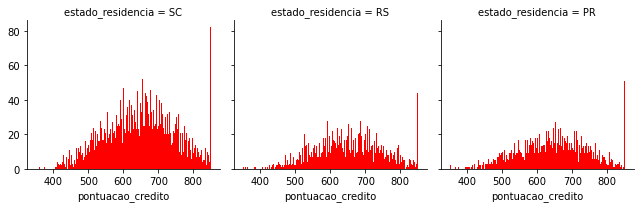

In [228]:
#Usando o FacetGrid para comparar a variável *pontuacao_credito* entre os estados e verificar se a moda está correta.
#aumentou-se o número de bins para verificar a moda. Melhor ainda é usar a função mode ou value_counts para cada estado.

g = sns.FacetGrid(data=df, col='estado_residencia')
g = g.map(plt.hist, 'pontuacao_credito', bins=200,color="r")

In [227]:
df.loc[df.estado_residencia == 'PR', 'pontuacao_credito'].value_counts()

850    47
714    13
651    12
660    12
634    12
       ..
561     1
839     1
845     1
702     1
350     1
Name: pontuacao_credito, Length: 403, dtype: int64

## Save as json

In [230]:
df_estados.to_json('mysubmission.json')